### Alejandro de Nicolás Gómez

# EXERCICIO DAE

## Enunciado da tarefa

Ao longo das anteriores prácticas traballouse con algunhas das diferentes ferramentas e técnicas que proporciona Python para o análise e tratamento de datos. Agora que xa coñeces as ferramentas é o momento de aplicalas para analizar un conxunto de datos.

O proceso de análise exploratorio de datos non é un camiño predefinido no que seguir uns pasos, polo que podes encontrar moitos exemplos diferentes que seguen pasos diferentes. Lembra que o obxectivo do EDA é coñecer mellor os datos, extraer información significativa que nos sirva para outros propósitos (por exemplo, para obter mellores modelos predictivos, entrenamentos mais efectivos, ...).

Algúns dos pasos que nos encontramos nunha análise EDA son:

* Descrición dos datos; significado dos diferentes campos
* Tipos de datos; verificar os tipos dos datos
* Mostrar datos de exemplo
* Cálculo de estatísticos descritivos
* Tratamento de outliers
* Impacto dos valores ausentes
* Gráficas

## Exemplos contidos na páxina de descarga do csv

You can use this data to rank cities with the most and least fast food restaurants across the U.S. E.g.:

    Cities with the most and least McDonald's per capita
    Fast food restaurants per capita for all states
    Fast food restaurants with the most locations nationally
    Major cities with the most and least fast food restaurants per capita
    Small cities with the most fast food restaurants per capita
    States with the most and least fast food restaurants per capita
    The number of fast food restaurants per capita


## DAE - Fast Food Restaurants Across America


### Descripción inicial do dataset

 Este dataset é unha lista de 10000 restaurantes de comida rápida sacadas do "Datafiniti's Business Database".

 [Enlace ao dataset](https://www.kaggle.com/yamqwe/fast-food-restaurants-across-americae?select=FastFoodRestaurants.csv)

As columnas que contén son:
* **city:**       cidade onde se atopa o restaurante
* **country:**    pais onde se atopa o restaurante
* **keys:**       
* **latitude**    
* **longitude**   
* **name:**       nome do restaurante
* **postalCode:** código postal do restaurante
* **province:**   estado onde se atopa o restaurante
* **sourceURLs:**
* **websites:**

### Carga de datos

Acceso a colab desde drive

In [ ]:
from google.colab import drive;
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Carga do CSV

In [ ]:
fastFood = pd.read_csv("/content/drive/MyDrive/SistemasBigData/Datafiniti_Fast_Food_Restaurants.csv");

### Estudo xeral dos datos

Vemos como está estruturada a táboa de datos

In [ ]:
fastFood.shape

(10000, 16)

In [ ]:
fastFood.sample(5)

,index,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
656,656,AVwdGu-QkufWRAb52Wen,2016-07-06T20:55:58Z,2018-06-22T18:28:46Z,1215 M 89,Fast Food Restaurants,Plainwell,US,us/mi/plainwell/1215m89/93075755,42.450431,-85.663248,Arby's,49080,MI,http://www.citysearch.com/profile/5392488/plai...,"http://www.arbys.com,https://locations.arbys.c..."
7615,7615,AVwdA5BAkufWRAb51ZoK,2016-03-27T14:48:39Z,2018-05-09T21:34:34Z,423 Wythe Creek Rd,Fast Food Restaurants,Poquoson,US,us/va/poquoson/423wythecreekrd/-891525969,37.122731,-76.392054,Subway,23662,VA,https://www.allmenus.com/va/poquoson/147774-su...,"http://www.subway.com,http://subway.com\r"
8024,8024,AV1_BBCfIxWefVJwid8b,2017-07-26T13:09:19Z,2018-05-07T11:08:03Z,613 Highway 53 East Se,Fast Food Restaurants,Calhoun,US,us/ga/calhoun/613highway53eastse/-66712705,34.473300,-84.924910,Pizza Hut,30701,GA,https://www.yellowpages.com/calhoun-ga/mip/piz...,http://www.pizzahut.com
8157,8157,AVwdH1HckufWRAb52hn_,2016-04-03T01:45:27Z,2018-05-01T23:08:14Z,3399 State Highway 365,Fast Food Restaurant,Alto,US,us/ga/alto/3399statehighway365/-1721138121,34.480522,-83.588615,Dairy Queen,30510,GA,https://foursquare.com/v/dairy-queen/4c1395e88...,http://www.dairyqueen.com
5686,5686,AVwcf-x7ByjofQCxe6m9,2016-06-08T16:13:33Z,2018-05-28T16:27:48Z,3644 Flat Shoals Rd,Fast Food Restaurants,Decatur,US,us/ga/decatur/3644flatshoalsrd/-864103396,33.701885,-84.267936,Taco Bell,30034,GA,https://www.allmenus.com/ga/decatur/196001-tac...,http://www.tacobell.com


Vemos con mas detalle as columnas

In [ ]:
#Con info, podemos ver que non temos diferencias no número de datos nulos en cada campo
#Tamén vemos que temos 3 columnas numéricas e 13 de tipo texto

fastFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        10000 non-null  int64  
 1   id           10000 non-null  object 
 2   dateAdded    10000 non-null  object 
 3   dateUpdated  10000 non-null  object 
 4   address      10000 non-null  object 
 5   categories   10000 non-null  object 
 6   city         10000 non-null  object 
 7   country      10000 non-null  object 
 8   keys         10000 non-null  object 
 9   latitude     10000 non-null  float64
 10  longitude    10000 non-null  float64
 11  name         10000 non-null  object 
 12  postalCode   10000 non-null  object 
 13  province     10000 non-null  object 
 14  sourceURLs   10000 non-null  object 
 15  websites     10000 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 1.2+ MB


In [ ]:
#Con describe, podemos ver os estadísticos descritivos das columnas numéricas

fastFood.describe()

,index,latitude,longitude
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,37.337400,-93.106515
std,2886.89568,5.100276,15.787614
min,0.00000,19.504168,-159.378066
25%,2499.75000,33.773973,-102.891796
50%,4999.50000,37.706263,-87.951148
75%,7499.25000,41.140722,-81.454907
max,9999.00000,64.840240,-67.463019


In [ ]:
#Engadindo o include="object", podemos ver estadísticos descritivos das columnas non-numéricas

fastFood.describe(include="object")

,id,dateAdded,dateUpdated,address,categories,city,country,keys,name,postalCode,province,sourceURLs,websites
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9343,8960,7052,9302,324,2764,1,9343,571,5429,50,9338,4136
top,AVwdiX0skufWRAb563Xt,2017-06-19T14:48:37Z,2018-06-19T09:42:27Z,3100 Riverside Dr,Fast Food Restaurant,Houston,US,us/ga/macon/3100riversidedr/93075755,McDonald's,78209,CA,There are too many sourceURLs objects to show....,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,4,6,12,4,3425,107,10000,4,1898,10,1201,6,830


### Correlacións

Podemos ver a correlación das filas numéricas. Neste caso non é moi interesante porque só temos latitude e lonxitude


In [ ]:
fastFood.corr()

,index,latitude,longitude
index,1.000000,-0.046334,0.043245
latitude,-0.046334,1.000000,0.071574
longitude,0.043245,0.071574,1.000000


### Cambios nos datos

É posible que poda mellorar a información do dataset cambiando o tipo de algúns datos

In [ ]:
#primeiro fago unha copia dos datos con deepcopy, así aseguro que non perdo os iniciais
fastFoodCopy = fastFood.copy(deep=True)

In [ ]:
#parece que todos os códigos postais son numéricos, pero algúns teñen información extra
#en formato "#####-####"
#podo probar a cambialos porque parece que non perdería moita información
fastFoodCopy['postalCode'].head(10)

0    70301
1    70301
2    37863
3    37863
4    30260
5    48204
6    48235
7    92056
8    11901
9    79756
Name: postalCode, dtype: object

In [ ]:
#paso a int o código postal e me quedo con só os datos nas primeiras 5 posicións
fastFoodCopy['codigoPostal'] = fastFoodCopy['postalCode'].map(lambda x: int(x[:5]))

In [ ]:
fastFoodCopy['codigoPostal'].head(10)

0    70301
1    70301
2    37863
3    37863
4    30260
5    48204
6    48235
7    92056
8    11901
9    79756
Name: codigoPostal, dtype: int64

In [ ]:
#Como dato curioso, podemos ver que o código postal ten unha correlación moito maior
#con lonxitude que con latitude
fastFoodCopyCorr = fastFoodCopy.corr()
fastFoodCopyCorr['codigoPostal'].sort_values(ascending=False)

codigoPostal    1.000000
index          -0.026341
latitude       -0.128152
longitude      -0.926560
Name: codigoPostal, dtype: float64

### Gráficas

Gracias aos cambios feitos no apartado anterior, podemos ver moi ben o mapa dos restaurantes co seu código postal

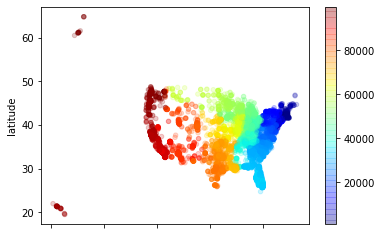

In [ ]:
fastFoodCopy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, 
                  c=fastFoodCopy['codigoPostal'], cmap=plt.get_cmap("jet"))

Podemos ver a cantidade de restaurantes en cada estado

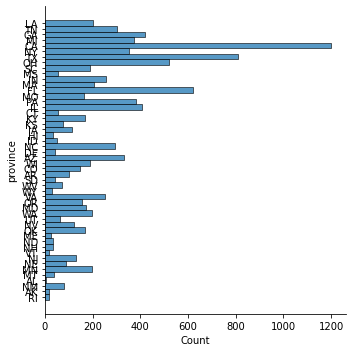

In [ ]:
sns.displot(data=fastFoodCopy,y='province')

Punto máis preto de todos os restaurantes en cada rexión

In [ ]:
grouped_fastFood = fastFoodCopy.groupby('province')
puntosQuentes = grouped_fastFood['codigoPostal'].mean()
puntosQuentes.sample(5)

province
KY    41075.168675
VT     5467.866667
MA     1976.321951
IA    51175.017391
VA    23185.877470
Name: codigoPostal, dtype: float64

In [ ]:
type(puntosQuentes)

pandas.core.series.Series

In [ ]:
puntosQuentesDF = pd.DataFrame(puntosQuentes)
puntosQuentesDF.sample(5)

,codigoPostal
province,
MS,39068.145455
AL,35704.833333
SD,57312.857143
MT,59609.684211
FL,33156.534622


### Outros datos interesantes

In [ ]:
#Provincias con maior e menor número de restaurantes

In [ ]:
grouped_fastFood['keys'].count().sort_values(ascending=False).head(5)

province
CA    1201
TX     811
FL     621
OH     522
GA     420
Name: keys, dtype: int64

In [ ]:
grouped_fastFood['keys'].count().sort_values(ascending=True).head(5)

province
AL     6
VT    15
RI    15
AK    16
ME    25
Name: keys, dtype: int64

### Outliers, nulos, repetidos

In [ ]:
#Facemos outra copia do dataframe previamente modificado, 
#por se borramos nestos pasos algún dato que máis adiante nos interese manter

fastFoodLimpo = fastFoodCopy.copy(deep=True)

Nulos

In [ ]:
fastFoodLimpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         10000 non-null  int64  
 1   id            10000 non-null  object 
 2   dateAdded     10000 non-null  object 
 3   dateUpdated   10000 non-null  object 
 4   address       10000 non-null  object 
 5   categories    10000 non-null  object 
 6   city          10000 non-null  object 
 7   country       10000 non-null  object 
 8   keys          10000 non-null  object 
 9   latitude      10000 non-null  float64
 10  longitude     10000 non-null  float64
 11  name          10000 non-null  object 
 12  postalCode    10000 non-null  object 
 13  province      10000 non-null  object 
 14  sourceURLs    10000 non-null  object 
 15  websites      10000 non-null  object 
 16  codigoPostal  10000 non-null  int64  
dtypes: float64(2), int64(2), object(13)
memory usage: 1.4+ MB


In [ ]:
#neste caso non temos datos nulos, pero poderíamos

In [ ]:
#borrar as filas que teñan datos nulos
fastFoodLimpo = fastFoodLimpo.dropna()

In [ ]:
#borrar as columnas que teñan datos nulos
fastFoodLimpo = fastFoodLimpo.dropna(axis=1)

In [ ]:
#engadir un treshold a esos borrados, para só facelos se pasan de "thresh" datos nulos
fastFoodLimpo = fastFoodLimpo.dropna(axis=1, thresh=10)

In [ ]:
#engadir "Descoñecido" nos valores nulos (ou 0 nos numéricos)
fastFoodLimpo = fastFoodLimpo.fillna("Descoñecido")

In [ ]:
# reemprazo con valores da fila anterior
fastFoodLimpo = fastFoodLimpo.fillna(method='ffill')

In [ ]:
# reemprazo don valores da fila posterios
fastFoodLimpo = fastFoodLimpo.fillna(method='bfill')

Filas Duplicadas

In [ ]:
#tampoco temos filas duplicadas
fastFoodLimpo[fastFoodLimpo.duplicated()]

,index,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,codigoPostal


In [ ]:
#as eliminaríamos de esta forma
fastFoodLimpo = fastFoodLimpo.drop_duplicates()

Outliers

In [ ]:
#Neste caso, pode ser posible que non queramos gardar os datos das zonas que estén moi lonxe
#Podemos tratalos como outliers e eliminalos

fastFoodLimpo.describe()

,index,latitude,longitude,codigoPostal
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,37.337400,-93.106515,54251.921900
std,2886.89568,5.100276,15.787614,28066.036321
min,0.00000,19.504168,-159.378066,1001.000000
25%,2499.75000,33.773973,-102.891796,30642.750000
50%,4999.50000,37.706263,-87.951148,50414.500000
75%,7499.25000,41.140722,-81.454907,78840.000000
max,9999.00000,64.840240,-67.463019,99709.000000


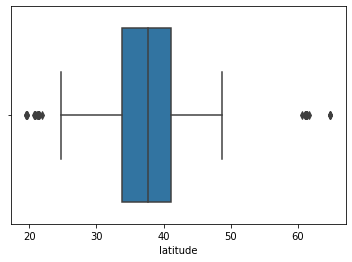

In [ ]:
sns.boxplot(data=fastFoodLimpo,x='latitude')

In [ ]:
#preparamos os datos
Q1 = fastFoodLimpo.latitude.quantile(0.25)
Q3 = fastFoodLimpo.latitude.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Cálculo dos "bigotes"
BI = (Q1 - 1.5 * IQR)
BS = (Q3 + 1.5 * IQR)

In [ ]:
#Os outliers serán os valores que están fóra do intervalo que definen os bigotes
outliers = fastFoodLimpo[(fastFoodLimpo.latitude < BI) | (fastFoodLimpo.latitude > BS)].sort_values('latitude')

In [ ]:
fastFoodLimpo = fastFoodLimpo[(fastFoodLimpo.latitude >= BI) & (fastFoodLimpo.latitude <= BS)].sort_values('latitude')

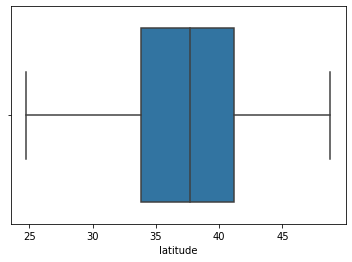

In [ ]:
sns.boxplot(data=fastFoodLimpo,x='latitude')

In [ ]:
#poderíamos repetir o mesmo para lonxitude, pero neste caso ao eliminar
#os outliers en latitude xa eliminamos os de lonxitude

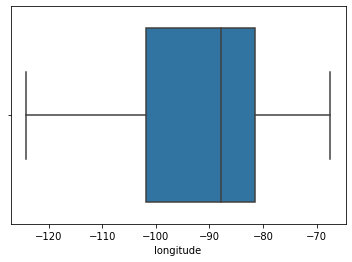

In [ ]:
sns.boxplot(data=fastFoodLimpo,x='longitude')

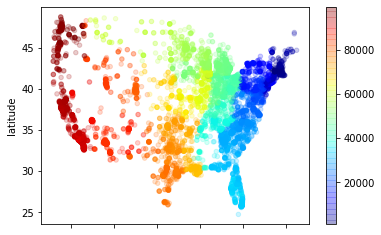

In [ ]:
#Xa podemos ver o dataframe cun área de terreno moito máis limitada

fastFoodLimpo.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, 
                  c=fastFoodLimpo['codigoPostal'], cmap=plt.get_cmap("jet"))